# Distance matrix plotting

Here is an example of plotting a distance matrix, along with loading and reordering distance matrices.

---
First, we load the package modules.

In [11]:
import spaceplot_DMtools as spdmt # tools to load/manipulate distance matrices
import spaceplot_plotter as spp # plotting tools

## Load data

Load DM and labels:

In [2]:
labels,DM = spdmt.read_DM( 'example_DM.csv')
print('Labels:',labels)
display(DM)

('Labels:', ['aggressive', 'caring', 'confident', 'dominant', 'emotionally_stable', 'intelligent', 'mean', 'responsible', 'sociable', 'trustworthy', 'unhappy', 'weird'])


array([[ 0.  ,  5.38,  3.35,  2.21,  5.05,  4.12,  2.3 ,  4.52,  4.19,
         4.84,  3.16,  4.25],
       [ 5.38,  0.  ,  3.07,  4.58,  2.49,  3.12,  5.95,  2.55,  2.68,
         2.26,  4.57,  3.74],
       [ 3.35,  3.07,  0.  ,  2.75,  2.42,  2.77,  4.14,  2.76,  2.26,
         2.88,  5.23,  4.36],
       [ 2.21,  4.58,  2.75,  0.  ,  3.88,  3.47,  2.81,  3.75,  3.51,
         4.06,  4.28,  4.52],
       [ 5.05,  2.49,  2.42,  3.88,  0.  ,  3.11,  5.17,  2.51,  2.82,
         2.51,  5.28,  4.32],
       [ 4.12,  3.12,  2.77,  3.47,  3.11,  0.  ,  4.25,  2.72,  3.32,
         3.03,  3.99,  3.36],
       [ 2.3 ,  5.95,  4.14,  2.81,  5.17,  4.25,  0.  ,  4.75,  4.87,
         5.31,  2.77,  4.35],
       [ 4.52,  2.55,  2.76,  3.75,  2.51,  2.72,  4.75,  0.  ,  3.17,
         2.15,  4.46,  4.11],
       [ 4.19,  2.68,  2.26,  3.51,  2.82,  3.32,  4.87,  3.17,  0.  ,
         3.06,  5.05,  4.52],
       [ 4.84,  2.26,  2.88,  4.06,  2.51,  3.03,  5.31,  2.15,  3.06,
         0.  ,  4.49

## Reordering labels
Here we reorder labels by a clustering algorithm output, so cluster members are adjacent.

In [12]:
from sklearn import cluster
from sklearn.cluster import KMeans

# cluster groupings acquisition
estimator = KMeans(n_clusters=3)
estimator.fit(DM)
cluster_grouping = {i: np.where(estimator.labels_ == i)[0] for i in range(estimator.n_clusters)}

# create the reordered indices based on clustering
new_order = []
for i in cluster_grouping:
    for n in cluster_grouping[i].tolist():
        new_order.append(n)

print('Original order:',labels)
labels,DM = spdmt.reorder_labels_DM(new_order,labels,DM)
print('New order:',labels)

('Original order:', ['caring', 'confident', 'emotionally_stable', 'intelligent', 'responsible', 'sociable', 'trustworthy', 'unhappy', 'weird', 'aggressive', 'dominant', 'mean'])
('New order:', ['aggressive', 'dominant', 'mean', 'caring', 'confident', 'emotionally_stable', 'intelligent', 'responsible', 'sociable', 'trustworthy', 'unhappy', 'weird'])


## Plot and save distance matrix

Help on function DM_plot in module spaceplot_plotter:

DM_plot(labels, DM, figoutpath='DM_plot.png')
    Plot distance matrix (DM)
    ---
    ARGUMENTS:
    ---
    labels: list of strings, each element a variable name
    DM: 2x2 numpy array, symmetric DM
    figoutpath: optional, str, filename/type if to save figure
    ---
    Returns: no return, produces plot



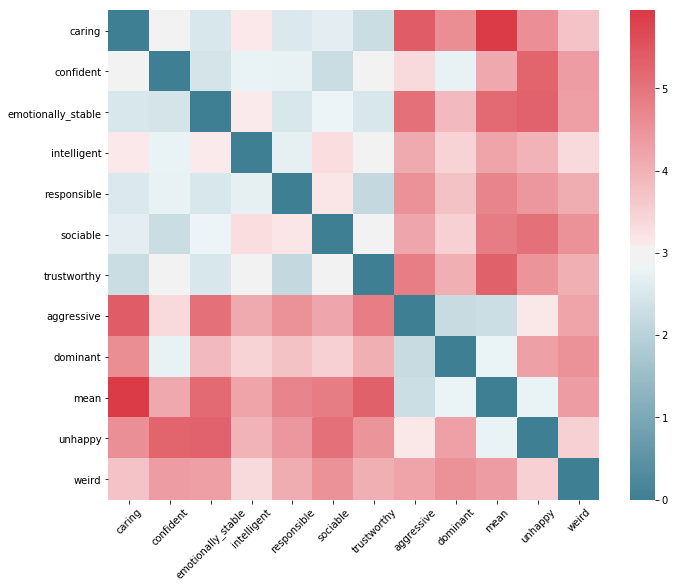

In [31]:
help(spp.DM_plot)
spp.DM_plot(labels,DM)